# chapter6

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases'
                '/breast-cancer-wisconsin/wdbc.data',
                header=None)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6068\1008248452.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


encoding class labels :

In [3]:
from sklearn.preprocessing import LabelEncoder
x = df.iloc[:,2:].values
y = df.iloc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [4]:
le.transform(['M', 'B'])

array([1, 0])

splitting

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.20, stratify=y, random_state=1)

pipelining standardization pca and logistic regression

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())
pipe_lr.fit(x_train, y_train)
y_pred = pipe_lr.predict(x_test)
test_acc = pipe_lr.score(x_test, y_test)
print("test accuracy :", test_acc)

test accuracy : 0.956140350877193


# k_fold cross validiation

In [7]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10).split(x_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(x_train[train], y_train[train])
    score = pipe_lr.score(x_train[test], y_train[test])
    scores.append(score)
    print(f'fold: {k+1:02d}, 'f'class disctr : {np.bincount(y_train[train])}', f'accuracy : {score:.3f}')

fold: 01, class disctr : [256 153] accuracy : 0.935
fold: 02, class disctr : [256 153] accuracy : 0.935
fold: 03, class disctr : [256 153] accuracy : 0.957
fold: 04, class disctr : [256 153] accuracy : 0.957
fold: 05, class disctr : [256 153] accuracy : 0.935
fold: 06, class disctr : [257 153] accuracy : 0.956
fold: 07, class disctr : [257 153] accuracy : 0.978
fold: 08, class disctr : [257 153] accuracy : 0.933
fold: 09, class disctr : [257 153] accuracy : 0.956
fold: 10, class disctr : [257 153] accuracy : 0.956


In [8]:
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'\ncv accuracy : {mean_acc:.3f} +- {std_acc}')


cv accuracy : 0.950 +- 0.013854294239660376


In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,
                         X = x_train,
                         y=y_train,
                         cv=10, 
                         n_jobs=1)
print(f'accuracy : {scores}')

accuracy : [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


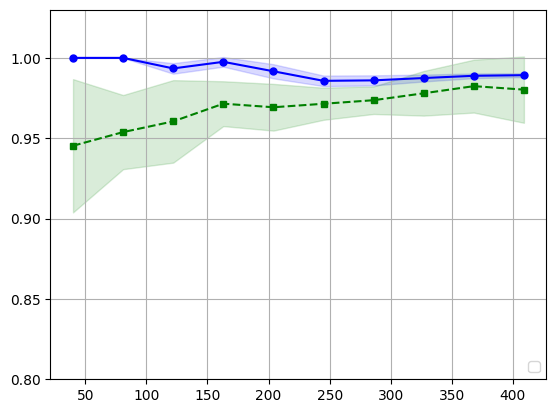

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2',
                                                             max_iter=10000))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=x_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10,
                                                        n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores,axis = 1)
plt.plot(train_sizes, train_mean, markersize=5, color='blue', marker='o')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std
                 , alpha = 0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5)
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.legend(loc='lower right')
plt.ylim([0.8 , 1.03])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


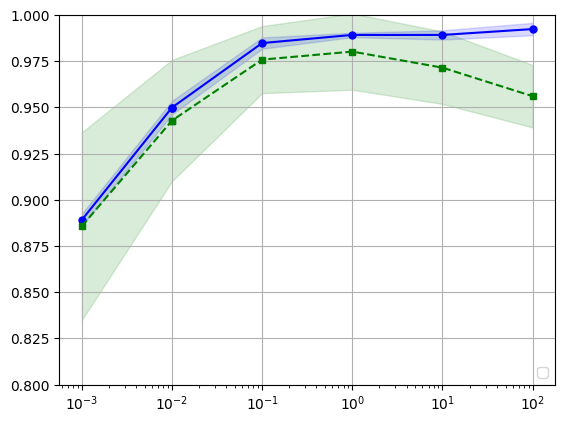

In [11]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                                            estimator=pipe_lr,
                                            X=x_train,
                                            y=y_train,
                                            param_name='logisticregression__C',
                                            param_range=param_range,
                                            cv=10                                            
                                           )
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean, color = 'blue',
         marker = 'o', markersize = 5)
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,
                 alpha = 0.15, color = 'blue')
plt.plot(param_range, test_mean , color = 'green', linestyle = '--',
         marker = 's', markersize = 5)
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,
                 alpha = 0.15, color = 'green')
plt.grid()
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.ylim([0.8, 1.0])
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_lr = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel':['linear']},
               {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel' : ['rbf']}]
gs = GridSearchCV(estimator=pipe_lr,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv = 10, 
                  refit=True,
                  n_jobs=-1
                  )
gs = gs.fit(x_train, y_train)
print(gs.best_score_)

0.9846859903381642


In [13]:
gs.best_params_

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

In [14]:
clf = gs.best_estimator_
clf.fit(x_train, y_train)
print(f'accuracy :{clf.score(x_test, y_test)}')

accuracy :0.9736842105263158


In [15]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [16]:
import scipy
param_range = scipy.stats.loguniform(0.0001, 1000.0)

In [17]:
param_range

In [18]:
np.random.seed(1)
param_range.rvs(10)

array([8.30145146e-02, 1.10222804e+01, 1.00184520e-04, 1.30715777e-02,
       1.06485687e-03, 4.42965766e-04, 2.01289666e-03, 2.62376594e-02,
       5.98924832e-02, 5.91176467e-01])

In [19]:
from sklearn.model_selection import RandomizedSearchCV
pipe_svc = make_pipeline(StandardScaler(), 
                         SVC(random_state=1))

In [20]:
param_grid = [{'svc__C': param_range,
'svc__kernel': ['linear']},
{'svc__C': param_range,
'svc__gamma': param_range,
'svc__kernel': ['rbf']}]

In [21]:
rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        refit=True,
                        n_iter=20,
                        cv=10,
                        random_state=1,
                        n_jobs=-1)
rs = rs.fit(x_train, y_train)
print(rs.best_score_)

0.9780676328502416


In [22]:
print(rs.best_params_)

{'svc__C': 0.05971247755848463, 'svc__kernel': 'linear'}


In [23]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

hs = HalvingRandomSearchCV(pipe_svc,
                         param_distributions = param_grid,
                         n_candidates = 'exhaust',
                         resource='n_samples',
                         factor=1.5,
                         random_state=1,
                         n_jobs=-1)
hs = hs.fit(x_train, y_train)
print(hs.best_score_)

0.9617647058823529


# nested cross validiation

In [ ]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
            'svc__kernel': ['linear']},
            {'svc__C': param_range,
            'svc__gamma': param_range,
            'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                param_grid=param_grid,
                scoring='accuracy',
                cv=2)

In [ ]:
scores = cross_val_score(gs, x_train, y_train, scoring='accuracy', cv=5)
print(f'CV accuracy: {np.mean(scores):.3f}')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
    scoring='accuracy',
    cv=2
)

scores = cross_val_score(gs, x_train, y_train,
                         scoring='accuracy', cv=5)
print(f'CV accuracy: {np.mean(scores):.3f}')

# confusion metrix

In [ ]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(x_train, y_train)
y_pred = pipe_svc.predict(x_test)
confmat =confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confusion_matrix)

In [ ]:
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j],
                va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import matthews_corrcoef
pre_val = precision_score(y_true=y_test, y_pred=y_pred)
rec_val = recall_score(y_true=y_test, y_pred=y_pred)
f1_val = f1_score(y_true=y_test, y_pred=y_pred)
mcc_val = matthews_corrcoef(y_true=y_test, y_pred=y_pred)

In [ ]:
from sklearn.metrics import make_scorer
c_gamma_range = [0.01, 0.1, 1.0, 10.0]
param_grid = [{'svc__C': c_gamma_range,
            'svc__kernel': ['linear']},
            {'svc__C': c_gamma_range,
            'svc__gamma': c_gamma_range,
            'svc__kernel': ['rbf']}]

scorer = make_scorer(f1_score, pos_label = 0)
gs = GridSearchCV(estimator=pipe_svc,
                param_grid=param_grid,
                scoring=scorer,
                cv=10)
gs = gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)